# Bibliotecas

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from ml_core.data_process import normalize_data
from ml_core.metrics.error_metrics import acuracy, precision, f1_score, recall
from ml_core.normalization import max_min_normalization


# Leitura dos Dados

In [2]:
df = pd.read_csv('data/californiabin.csv', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8
0,4.1685,20.0,6.700637,1.178344,745.0,2.372611,38.80,-121.15,1.0
1,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.0
2,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.0
3,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,0.0
4,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,1.0
...,...,...,...,...,...,...,...,...,...
2995,4.0050,7.0,4.966767,1.021148,1143.0,3.453172,36.84,-121.44,1.0
2996,1.0560,24.0,4.462069,1.112644,1277.0,2.935632,35.36,-119.01,0.0
2997,3.2824,52.0,4.356984,1.064302,794.0,1.760532,34.08,-118.36,1.0
2998,2.3056,36.0,5.268657,0.970149,792.0,2.955224,38.14,-122.23,0.0


# Preparando os Dados

In [4]:
arr = df.to_numpy()

In [5]:
x = arr[:, :-1]
y = arr[:, -1]

In [6]:
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
x_trn_norm = normalize_data(x_trn, max_min_normalization)
x_tst_norm = normalize_data(x_tst, max_min_normalization)

# Definindo o K-Fold

In [8]:
cv_kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Definindo as grids

In [9]:
svc_grid = {
    'gamma': 2 ** np.arange(-15, 4, 2, dtype=float),
    'C': 2 ** np.arange(-5, 16, 2, dtype=float)
}

In [10]:
random_forest_grid = {
	'n_estimators': np.arange(10, 210, 10),
	'max_depth': [2, 4, 6, 8, None]
}

# Definindo os Modelos

In [11]:
svc = SVC(kernel='rbf')

random_forest = RandomForestClassifier()

# Executando a Grid com K-Fold

In [12]:
svc_tunned = GridSearchCV(svc, svc_grid, cv=cv_kfold, return_train_score=True, n_jobs=-1)
svc_tunned.fit(x_trn_norm, y_trn)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([3.1250e-02, 1.2500e-01, 5.0000e-01, 2.0000e+00, 8.0000e+00,
       3.2000e+01, 1.2800e+02, 5.1200e+02, 2.0480e+03, 8.1920e+03,
       3.2768e+04]),
                         'gamma': array([3.05175781e-05, 1.22070312e-04, 4.88281250e-04, 1.95312500e-03,
       7.81250000e-03, 3.12500000e-02, 1.25000000e-01, 5.00000000e-01,
       2.00000000e+00, 8.00000000e+00])},
             return_train_score=True)

In [13]:
rf_tunned = GridSearchCV(random_forest, random_forest_grid, cv=cv_kfold, return_train_score=True, n_jobs=-1)
rf_tunned.fit(x_trn_norm, y_trn)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, None],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
             return_train_score=True)

# Fazendo as Melhores Predições

In [14]:
preds_svc = svc_tunned.best_estimator_.predict(x_tst_norm)
preds_rf = rf_tunned.best_estimator_.predict(x_tst_norm)

# Vendo os Resultados

## SVC

In [17]:
{
    'Acuracia': acuracy(y_tst.reshape([-1, 1]), preds_svc.reshape([-1, 1])),
    'F1-Score': f1_score(y_tst.reshape([-1, 1]), preds_svc.reshape([-1, 1])),
    'Precisão': precision(y_tst.reshape([-1, 1]), preds_svc.reshape([-1, 1])),
    'Revocação': recall(y_tst.reshape([-1, 1]), preds_svc.reshape([-1, 1]))
}

{'Acuracia': 0.7155555555555555,
 'F1-Score': 0.5503597122302157,
 'Precisão': 0.4751552795031056,
 'Revocação': 0.6538461538461539}

## Random Florest

In [18]:
{
    'Acuracia': acuracy(y_tst.reshape([-1, 1]), preds_rf.reshape([-1, 1])),
    'F1-Score': f1_score(y_tst.reshape([-1, 1]), preds_rf.reshape([-1, 1])),
    'Precisão': precision(y_tst.reshape([-1, 1]), preds_rf.reshape([-1, 1])),
    'Revocação': recall(y_tst.reshape([-1, 1]), preds_rf.reshape([-1, 1]))
}

{'Acuracia': 0.7944444444444444,
 'F1-Score': 0.6035502958579881,
 'Precisão': 0.4993006993006993,
 'Revocação': 0.7628205128205128}

# Curva ROC

## SVC

C:\Users\Pichau\miniconda3\envs\machine-learning-project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Pichau\miniconda3\envs\machine-learning-project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(<sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x1e6c691fdc0>,
 <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x1e6c6db9690>)

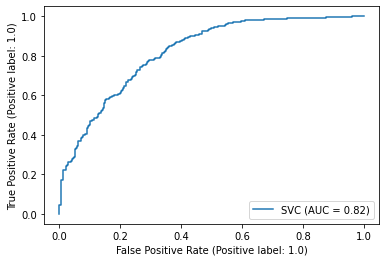

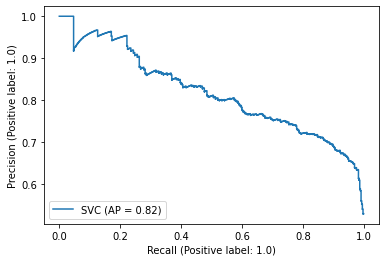

In [28]:
plot_roc_curve(svc_tunned.best_estimator_, x_tst_norm, y_tst), plot_precision_recall_curve(svc_tunned.best_estimator_, x_tst_norm, y_tst)

## Random Florest

C:\Users\Pichau\miniconda3\envs\machine-learning-project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Pichau\miniconda3\envs\machine-learning-project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(<sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x1e6c697cac0>,
 <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x1e6c6cea620>)

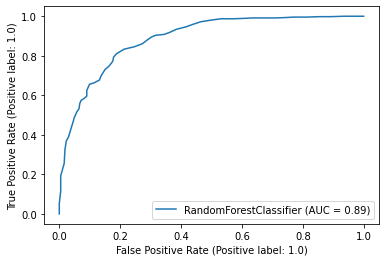

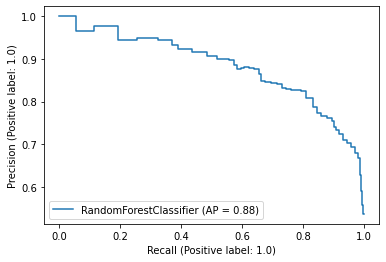

In [27]:
plot_roc_curve(rf_tunned.best_estimator_, x_tst_norm, y_tst), plot_precision_recall_curve(rf_tunned.best_estimator_, x_tst_norm, y_tst)